# ****BIVARIATE ANALYSIS****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
df = pd.read_csv(r"cleaned_data.csv")

In [3]:
df 

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


#### Before moving to Bivariate analysis , we will drop some irrelevant column like the id and dataset

In [4]:
# Dropping irrelevant columns before bivariate analysis
df = df.drop(columns=['id', 'dataset'])


In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


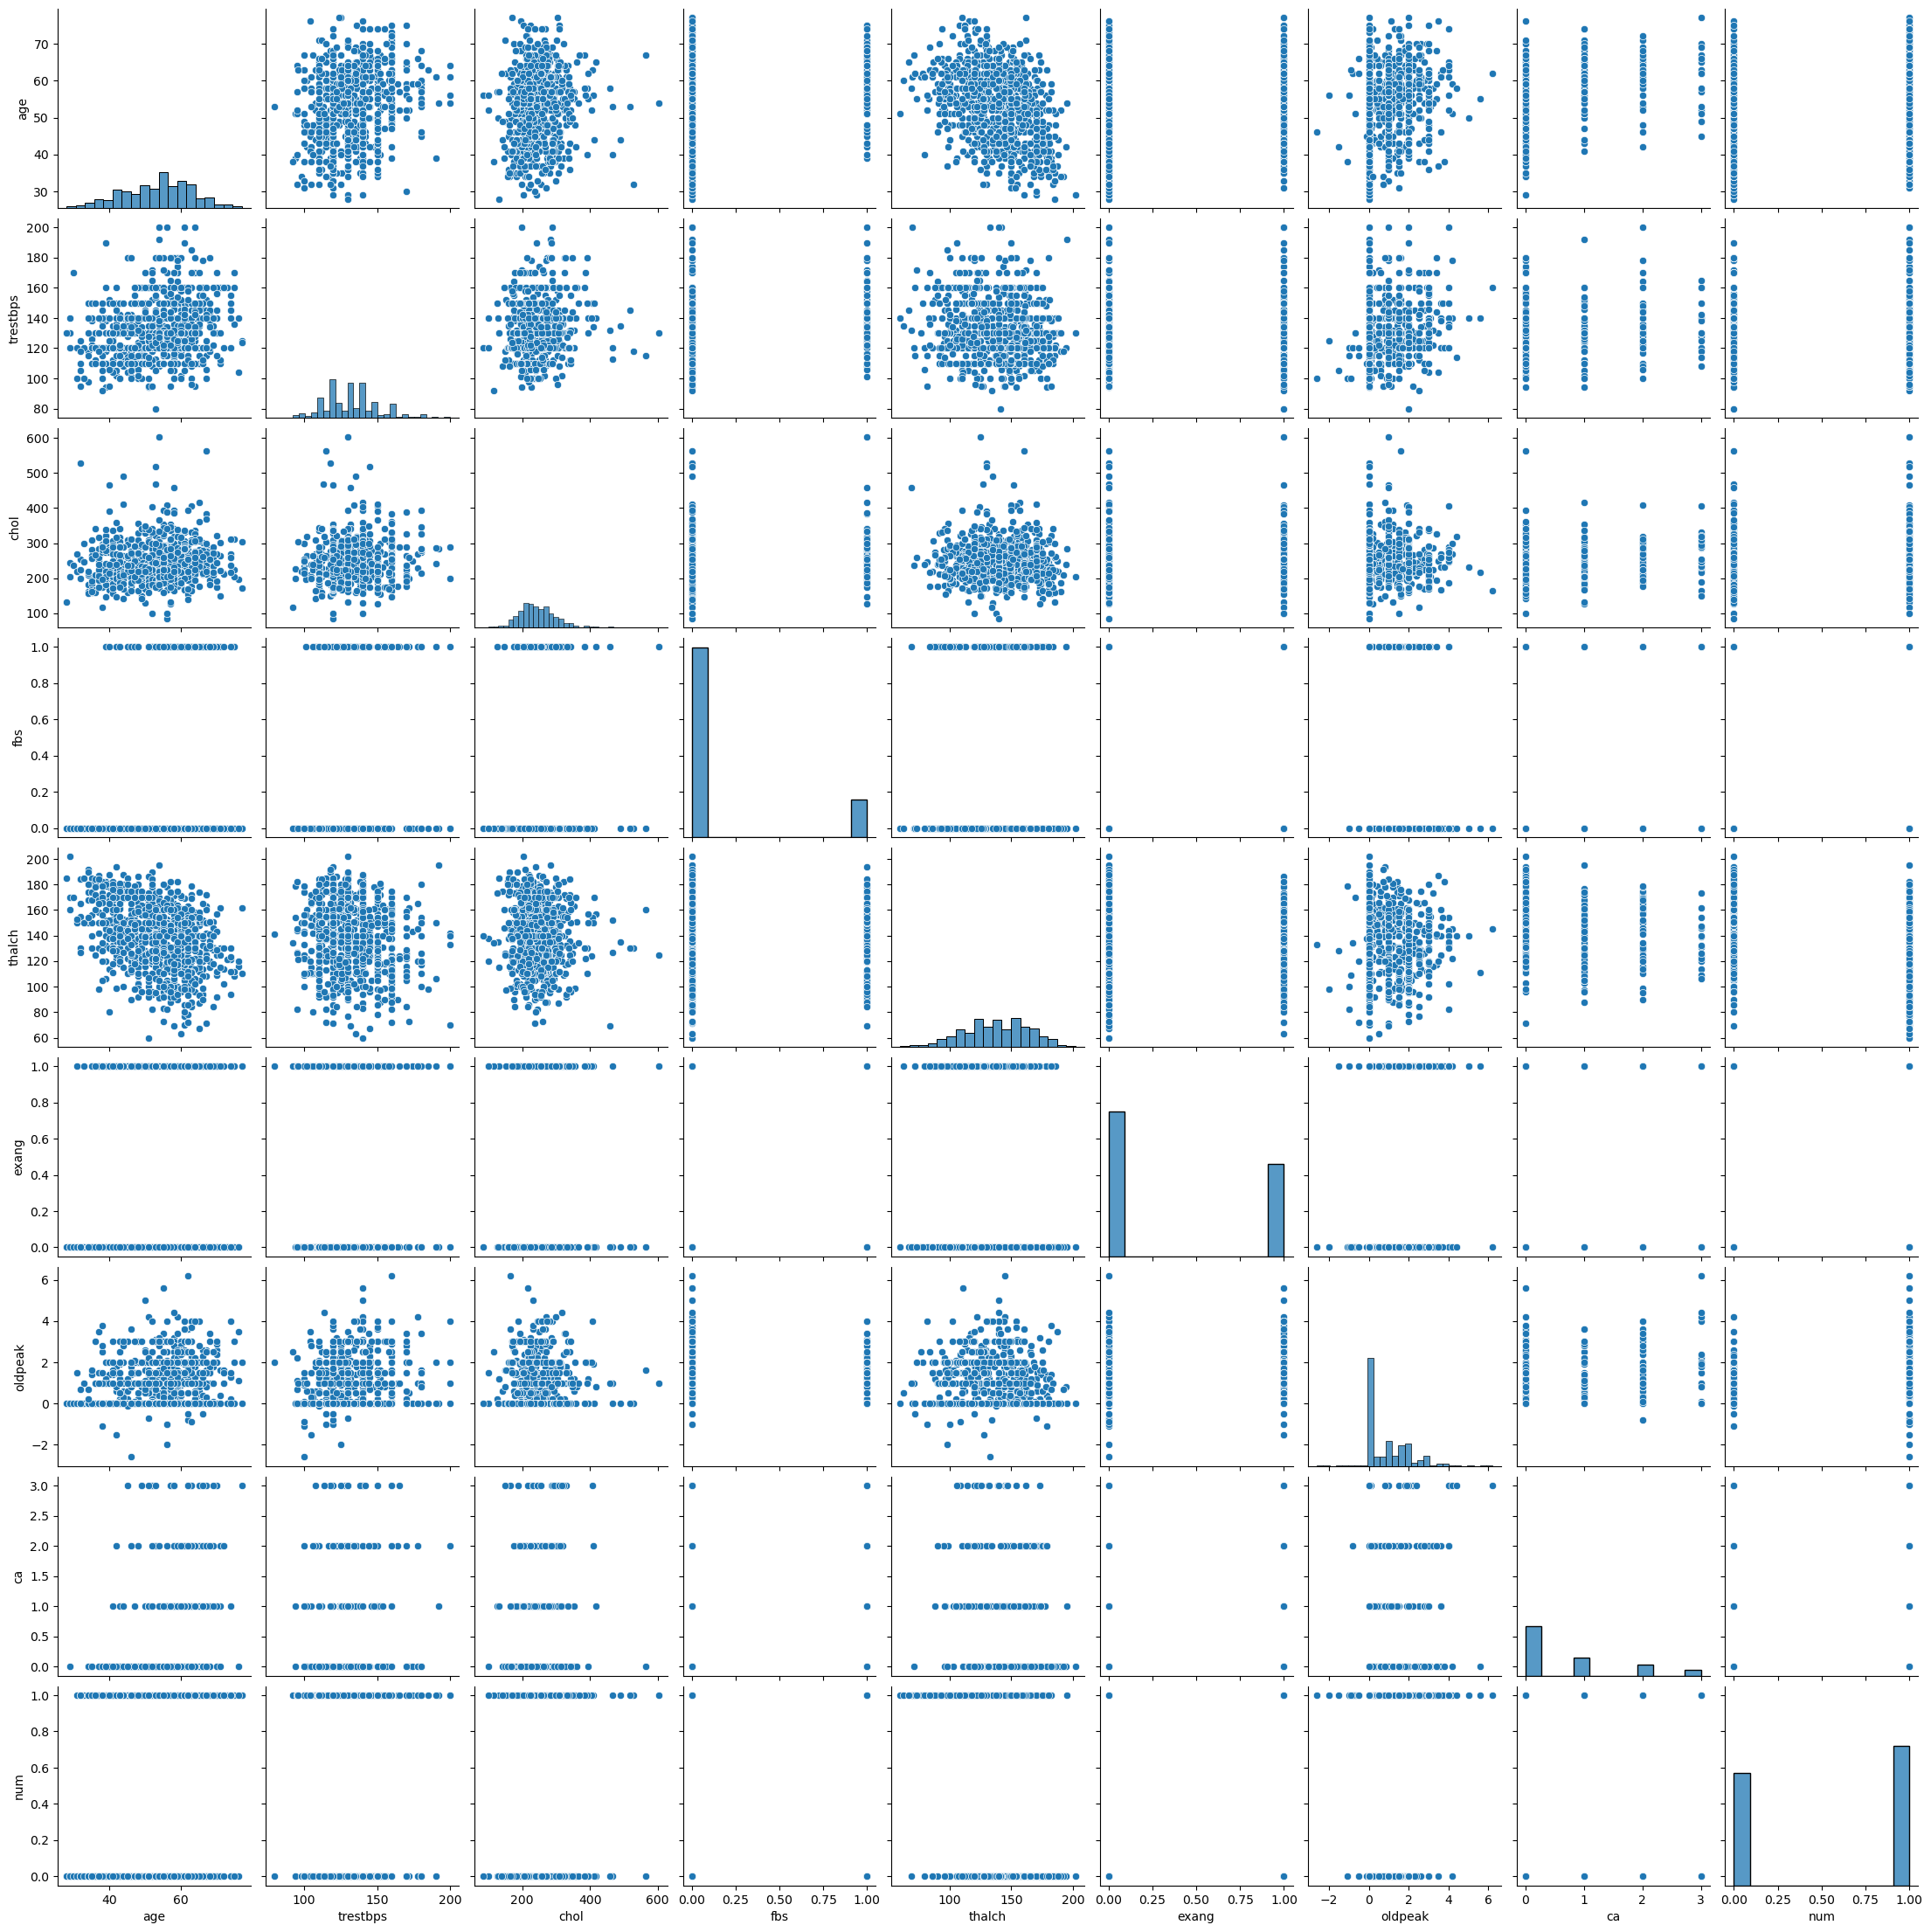

In [6]:
sns.pairplot(df)
plt.show()

# Age Column

### age vs num

#### barplot

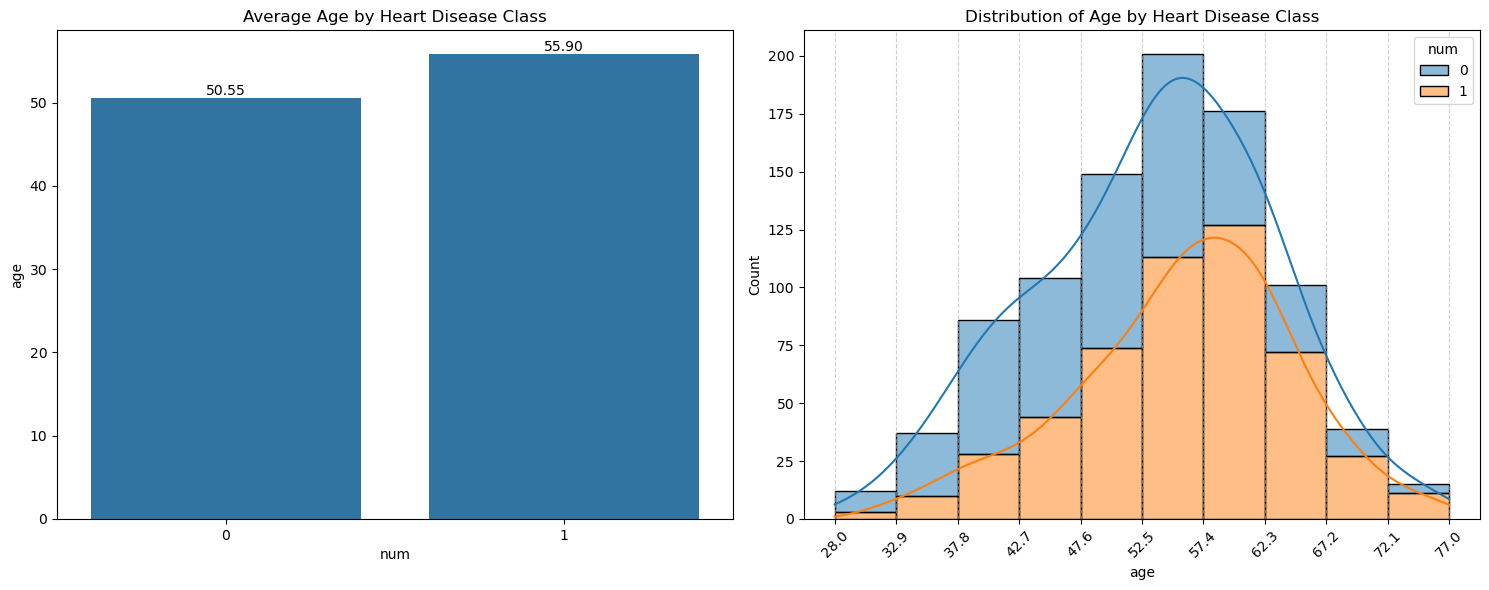

In [7]:

# Create bin edges 
bin_edges = np.histogram_bin_edges(df['age'].dropna(), bins=10)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Barplot: Mean Age by Class
graph = sns.barplot(data=df, x="num", y="age", estimator=np.mean, errorbar=None, ax=ax[0])
graph.bar_label(graph.containers[0], fmt='%.2f')  # Add value labels
ax[0].set_title('Average Age by Heart Disease Class')

# Histogram + KDE Plot
sns.histplot(data=df, x='age', kde=True, hue='num', multiple='stack', fill=True, bins=bin_edges, ax=ax[1])
ax[1].set_xticks(np.round(bin_edges, 1))
ax[1].set_xticklabels(np.round(bin_edges, 1), rotation=45)
ax[1].grid(axis='x', linestyle='--', alpha=0.6)
ax[1].set_title('Distribution of Age by Heart Disease Class')

plt.tight_layout()
plt.show()


#### The distribution shows a slight shift — patients with heart disease tend to be slightly older than those without heart disease.

# Trestbps Vs num

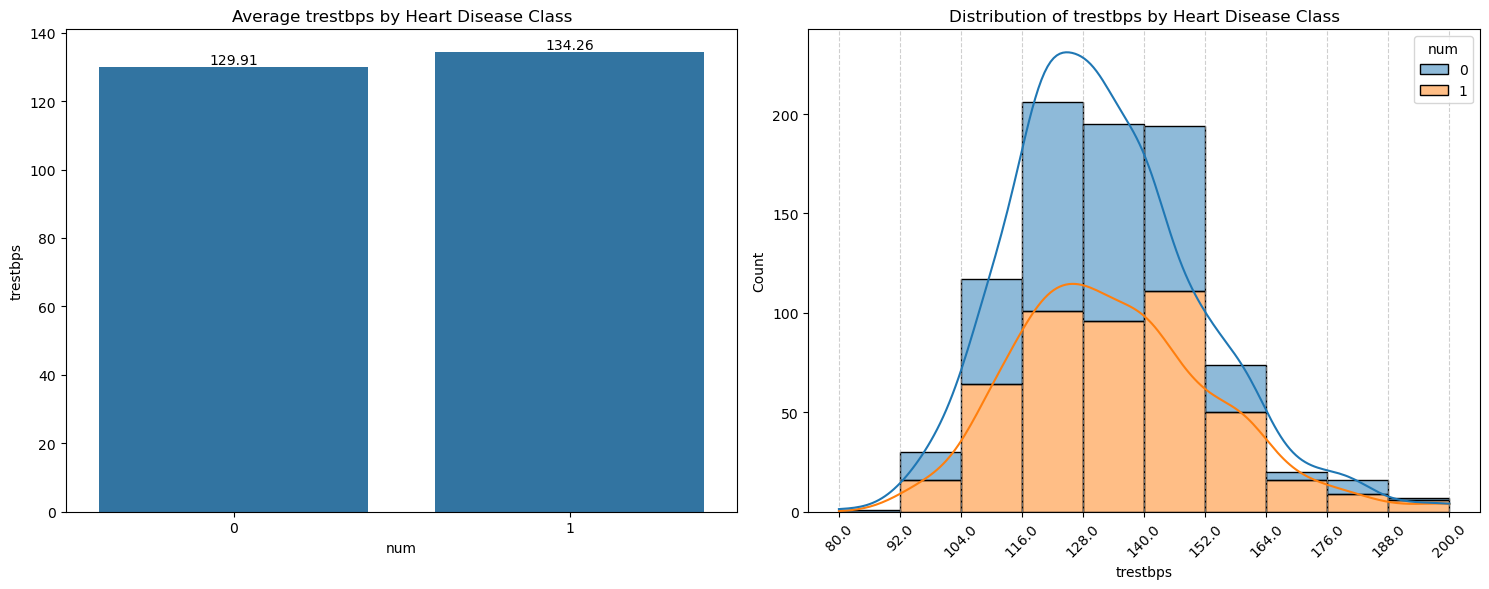

In [8]:

bin_edges = np.histogram_bin_edges(df['trestbps'].dropna(), bins=10)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

#Bar PLot  : Mean resting blood pressure by class 
graph = sns.barplot(data=df, x="num", y="trestbps", estimator=np.mean, errorbar=None, ax=ax[0])
graph.bar_label(graph.containers[0], fmt='%.2f')  # Add value labels
ax[0].set_title('Average trestbps by Heart Disease Class')

# Histogram + KDE Plot
sns.histplot(data=df, x='trestbps', kde=True, hue='num', multiple='stack', fill=True, bins=bin_edges, ax=ax[1])
ax[1].set_xticks(np.round(bin_edges, 1))
ax[1].set_xticklabels(np.round(bin_edges, 1), rotation=45)
ax[1].grid(axis='x', linestyle='--', alpha=0.6)
ax[1].set_title('Distribution of trestbps by Heart Disease Class')

plt.tight_layout()
plt.show()


#### "The distribution shows a slight shift — patients with heart disease have an average resting blood pressure of 134.26 mm Hg, while those without heart disease have an average of 129.91 mm Hg. According to clinical guidelines, a normal resting blood pressure falls in the range 120 mm Hg to 129 mm Hg . Both groups fall into the 'HIGH BLOOD PRESSURE (HYPERTENSION) STAGE 1' category, but patients with heart disease tend to have slightly higher blood pressure."
##### Reference : https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

# chol(Cholestrol) vs num

In [9]:
df['num'].value_counts()

num
1    509
0    411
Name: count, dtype: int64

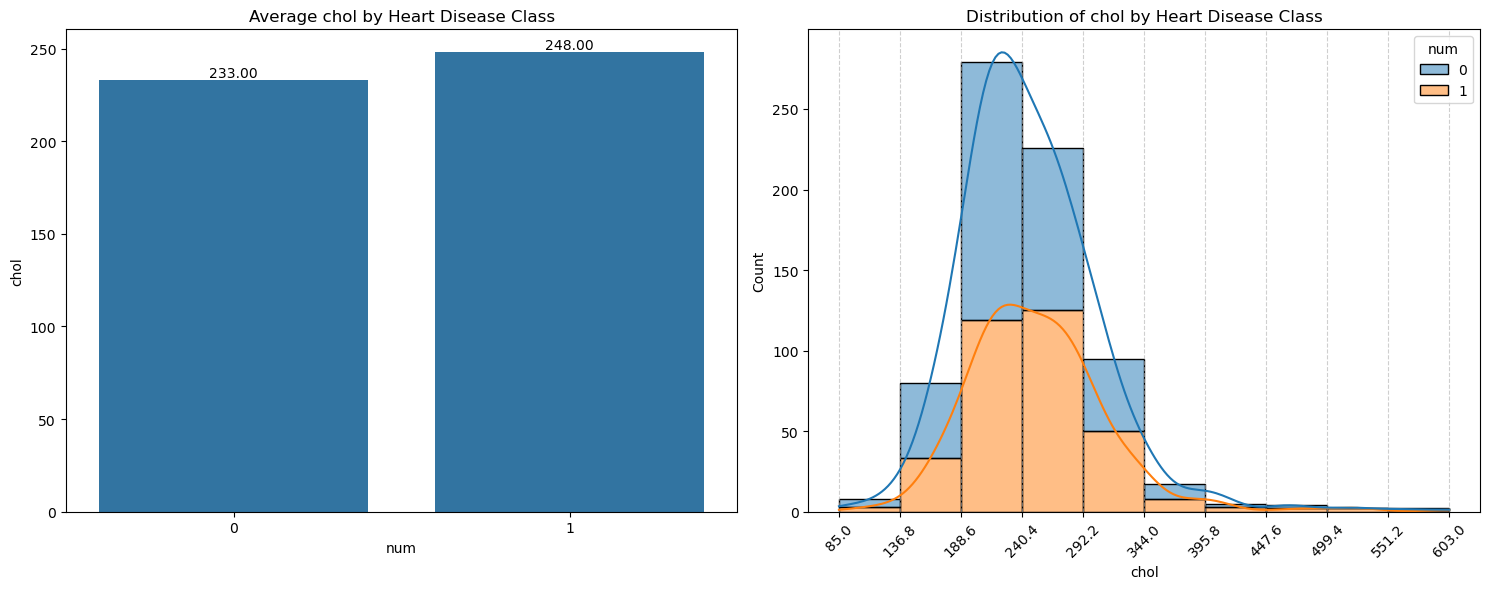

In [10]:

bin_edges = np.histogram_bin_edges(df['chol'].dropna(), bins=10)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
#Bar PLot
graph = sns.barplot(data=df, x="num", y="chol", estimator=np.median, errorbar=None, ax=ax[0])
graph.bar_label(graph.containers[0], fmt='%.2f')  # Add value labels
ax[0].set_title('Average chol by Heart Disease Class')

# Histogram + KDE Plot
sns.histplot(data=df, x='chol', kde=True, hue='num', multiple='stack', fill=True, bins=bin_edges, ax=ax[1])
ax[1].set_xticks(np.round(bin_edges, 1))
ax[1].set_xticklabels(np.round(bin_edges, 1), rotation=45)
ax[1].grid(axis='x', linestyle='--', alpha=0.6)
ax[1].set_title('Distribution of chol by Heart Disease Class')

plt.tight_layout()
plt.show()


#### The distribution shows a  clear shift: patients without heart disease have an average cholesterol level of 233 mg/dL, which puts them at risk of getting a heart disease . In comparison, patients with heart disease have an even higher average cholesterol level of 248 mg/dL, indicating a major risk for cardiovascular problems."

##### Reference : https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean 

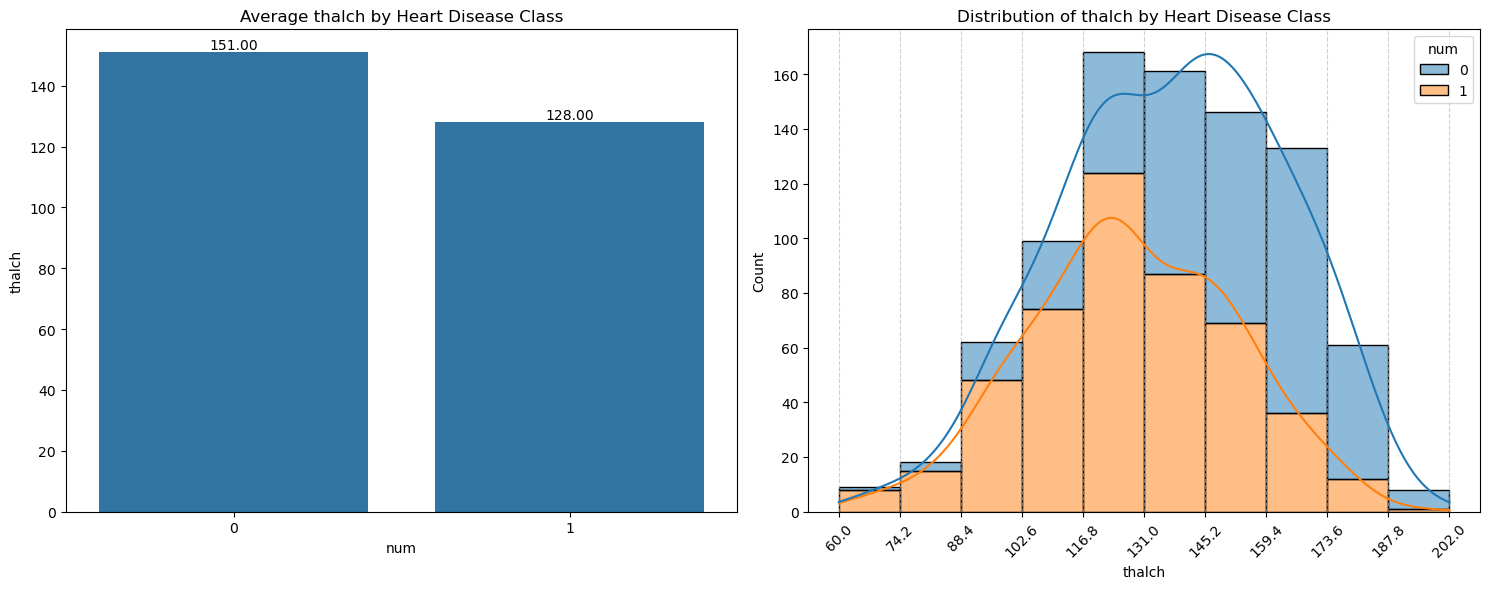

In [11]:

bin_edges = np.histogram_bin_edges(df['thalch'].dropna(), bins=10)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
#Bar PLot
graph = sns.barplot(data=df, x="num", y="thalch", estimator=np.median, errorbar=None, ax=ax[0])
graph.bar_label(graph.containers[0], fmt='%.2f')  # Add value labels
ax[0].set_title('Average thalch by Heart Disease Class')

# Histogram + KDE Plot
sns.histplot(data=df, x='thalch', kde=True, hue='num', multiple='stack', fill=True, bins=bin_edges, ax=ax[1])
ax[1].set_xticks(np.round(bin_edges, 1))
ax[1].set_xticklabels(np.round(bin_edges, 1), rotation=45)
ax[1].grid(axis='x', linestyle='--', alpha=0.6)
ax[1].set_title('Distribution of thalch by Heart Disease Class')

plt.tight_layout()
plt.show()


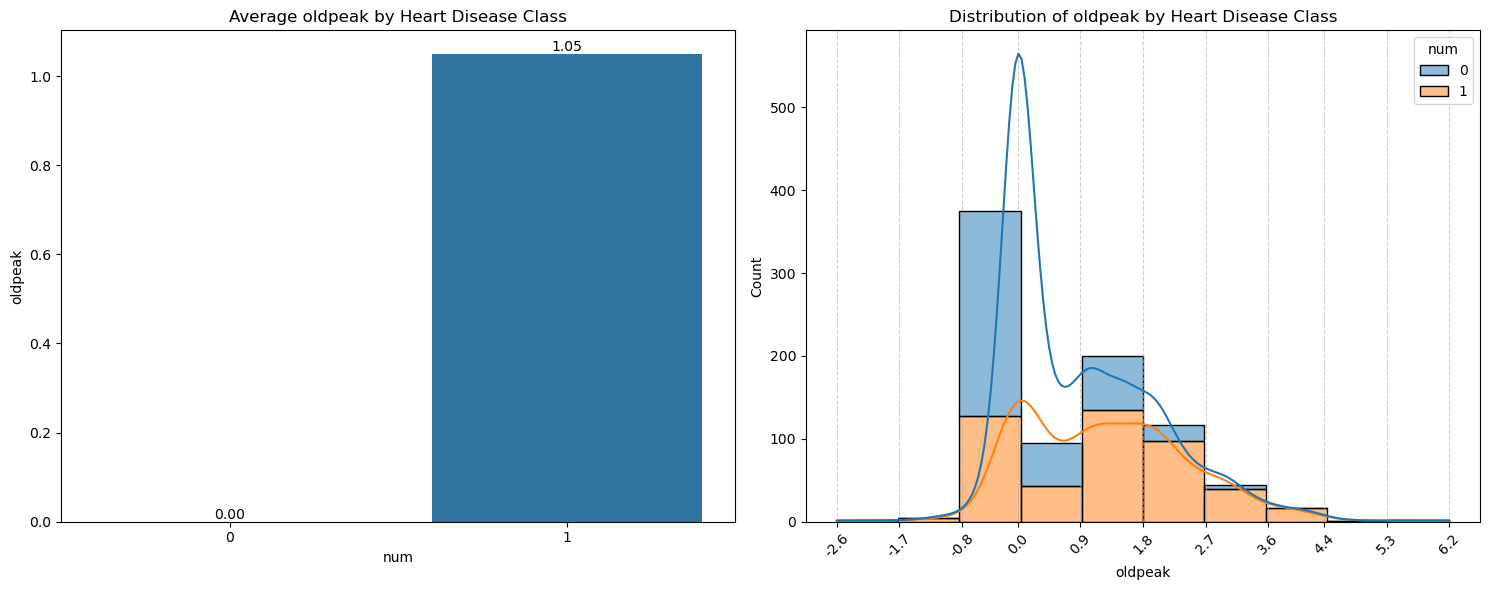

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


bin_edges = np.histogram_bin_edges(df['oldpeak'].dropna(), bins=10)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
#Bar PLot
graph = sns.barplot(data=df, x="num", y="oldpeak", estimator=np.median, errorbar=None, ax=ax[0])
graph.bar_label(graph.containers[0], fmt='%.2f')  # Add value labels
ax[0].set_title('Average oldpeak by Heart Disease Class')

# Histogram + KDE Plot
sns.histplot(data=df, x='oldpeak', kde=True, hue='num', multiple='stack', fill=True, bins=bin_edges, ax=ax[1])
ax[1].set_xticks(np.round(bin_edges, 1))
ax[1].set_xticklabels(np.round(bin_edges, 1), rotation=45)
ax[1].grid(axis='x', linestyle='--', alpha=0.6)
ax[1].set_title('Distribution of oldpeak by Heart Disease Class')

plt.tight_layout()
plt.show()


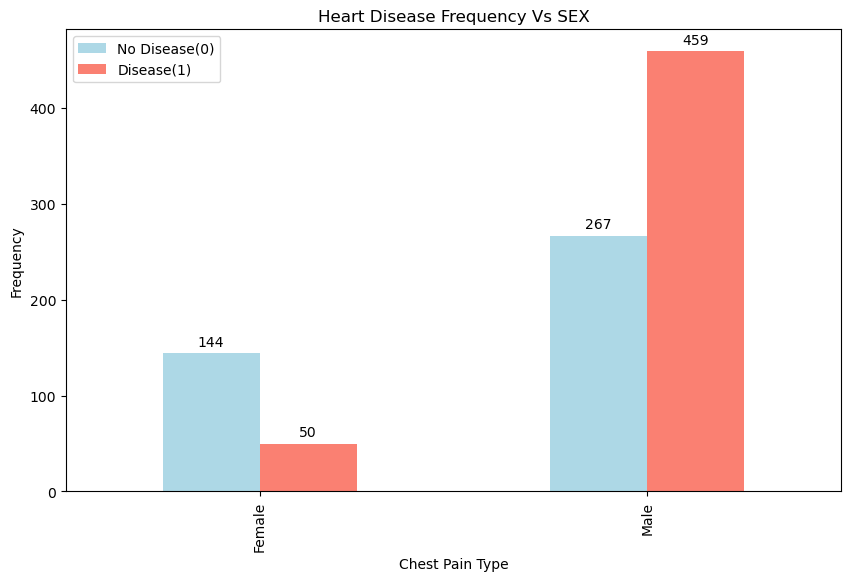

In [13]:
ax = pd.crosstab(df.sex, df.num).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)
plt.title("Heart Disease Frequency Vs SEX")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease(0)", "Disease(1)"])

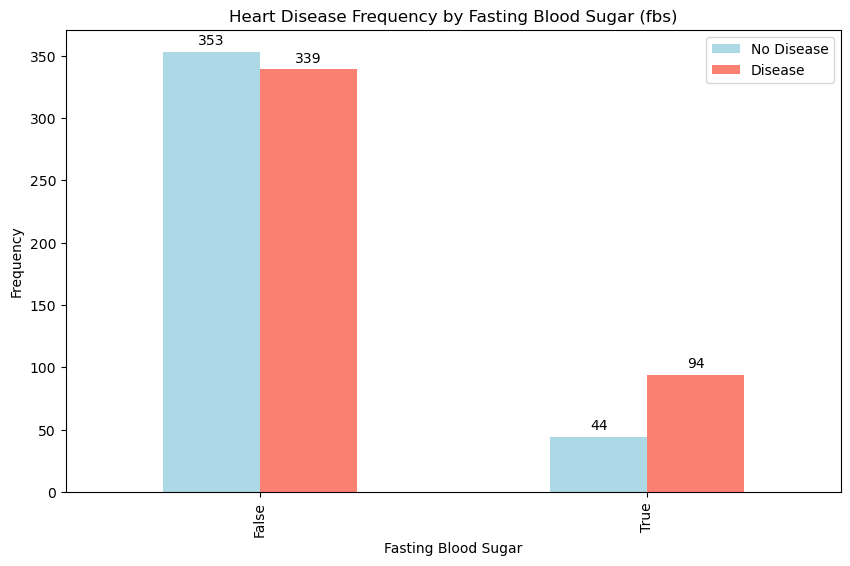

In [14]:
ax = pd.crosstab( df.fbs , df.num ).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)
# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency by Fasting Blood Sugar (fbs)")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])


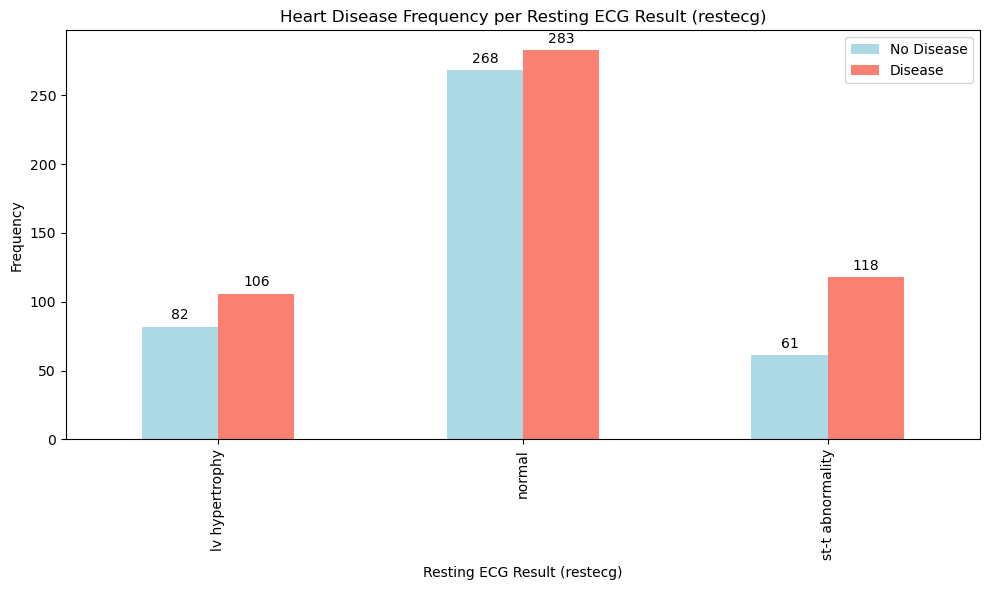

In [15]:
ax = pd.crosstab(df.restecg, df.num).plot(kind="bar",figsize=(10,6) , color=["lightblue", "salmon"])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)


plt.title("Heart Disease Frequency per Resting ECG Result (restecg)")
plt.xlabel("Resting ECG Result (restecg)")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])

plt.tight_layout()
plt.show()


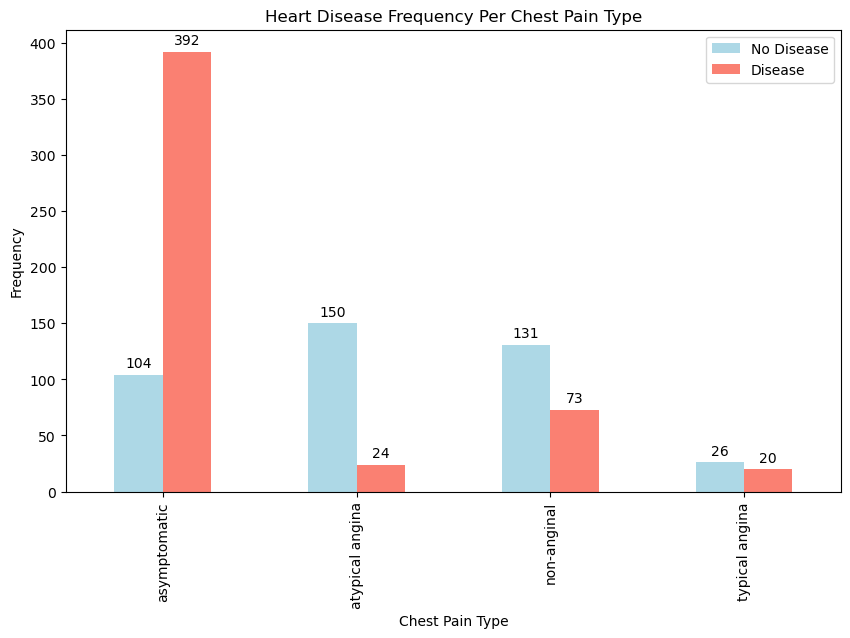

In [16]:
ax = pd.crosstab(df.cp, df.num).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.show()

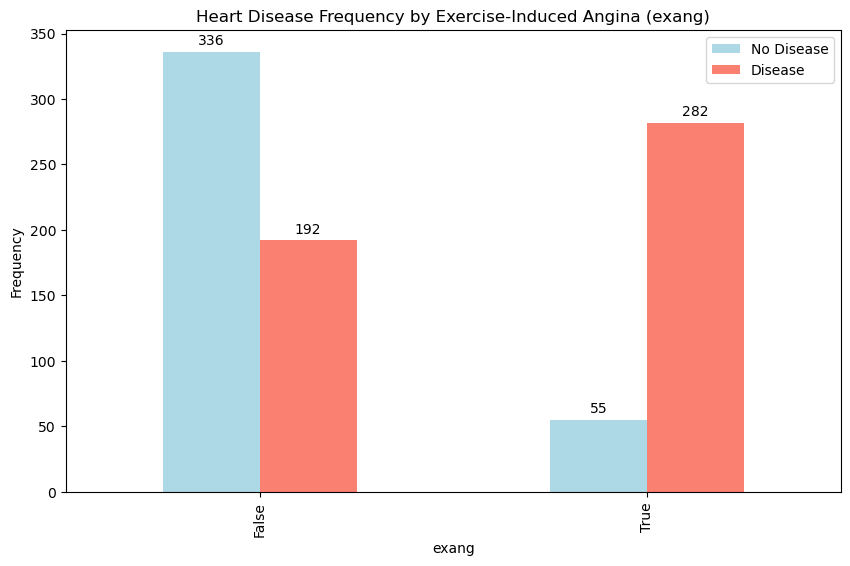

In [17]:
ax = pd.crosstab(df.exang, df.num).plot(kind="bar", 
                                       figsize=(10,6), 
                                       color=["lightblue", "salmon"])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

# Correct title and axis labels
plt.title("Heart Disease Frequency by Exercise-Induced Angina (exang)")
plt.xlabel("exang")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.show()


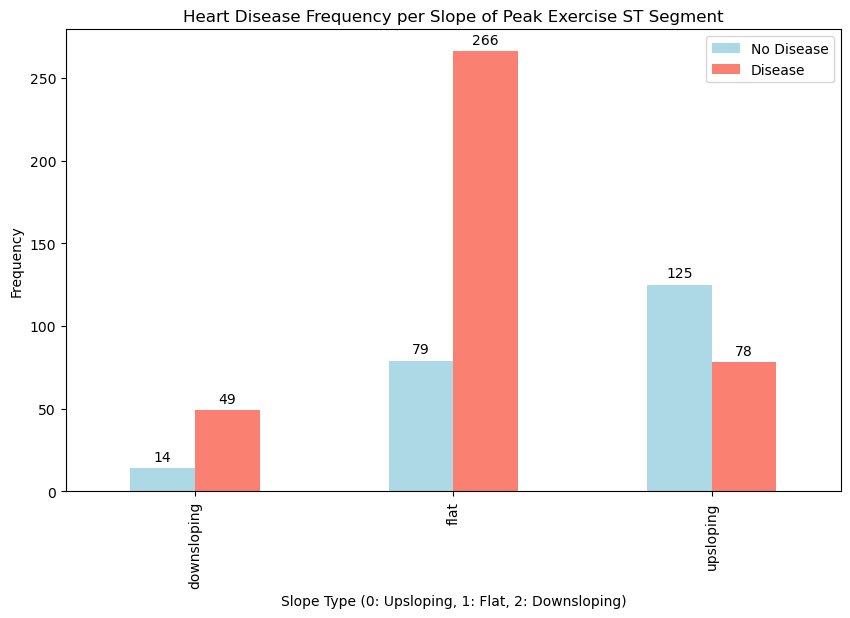

In [18]:
ax = pd.crosstab(df.slope, df.num).plot(kind="bar", 
                                       figsize=(10,6), 
                                       color=["lightblue", "salmon"])

# Attach values to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

# Proper plot title and axis labels
plt.title("Heart Disease Frequency per Slope of Peak Exercise ST Segment")
plt.xlabel("Slope Type (0: Upsloping, 1: Flat, 2: Downsloping)")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.show()


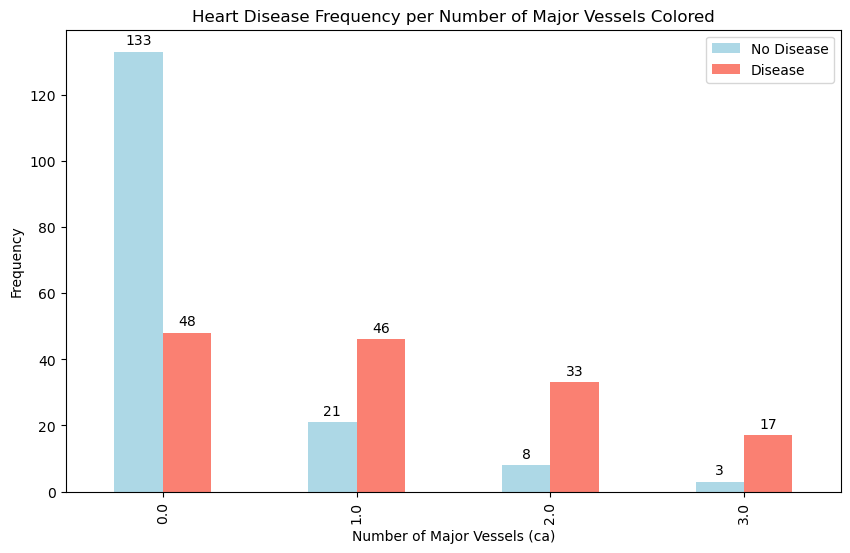

In [19]:
ax = pd.crosstab(df.ca, df.num).plot(kind="bar", 
                                     figsize=(10,6), 
                                     color=["lightblue", "salmon"])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

# Correct plot attributes
plt.title("Heart Disease Frequency per Number of Major Vessels Colored")
plt.xlabel("Number of Major Vessels (ca)")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.show()


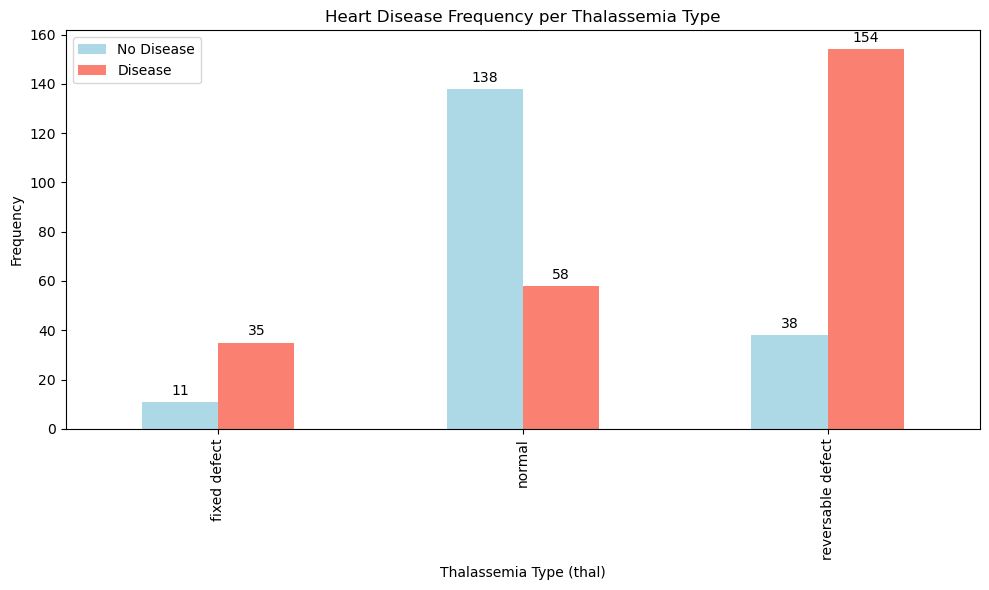

In [20]:
ax = pd.crosstab(df.thal, df.num).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)
plt.title("Heart Disease Frequency per Thalassemia Type")
plt.xlabel("Thalassemia Type (thal)")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])

plt.tight_layout()
plt.show()


In [21]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  860 non-null    float64
 4   chol      718 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  860 non-null    float64
 4   chol      718 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [24]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


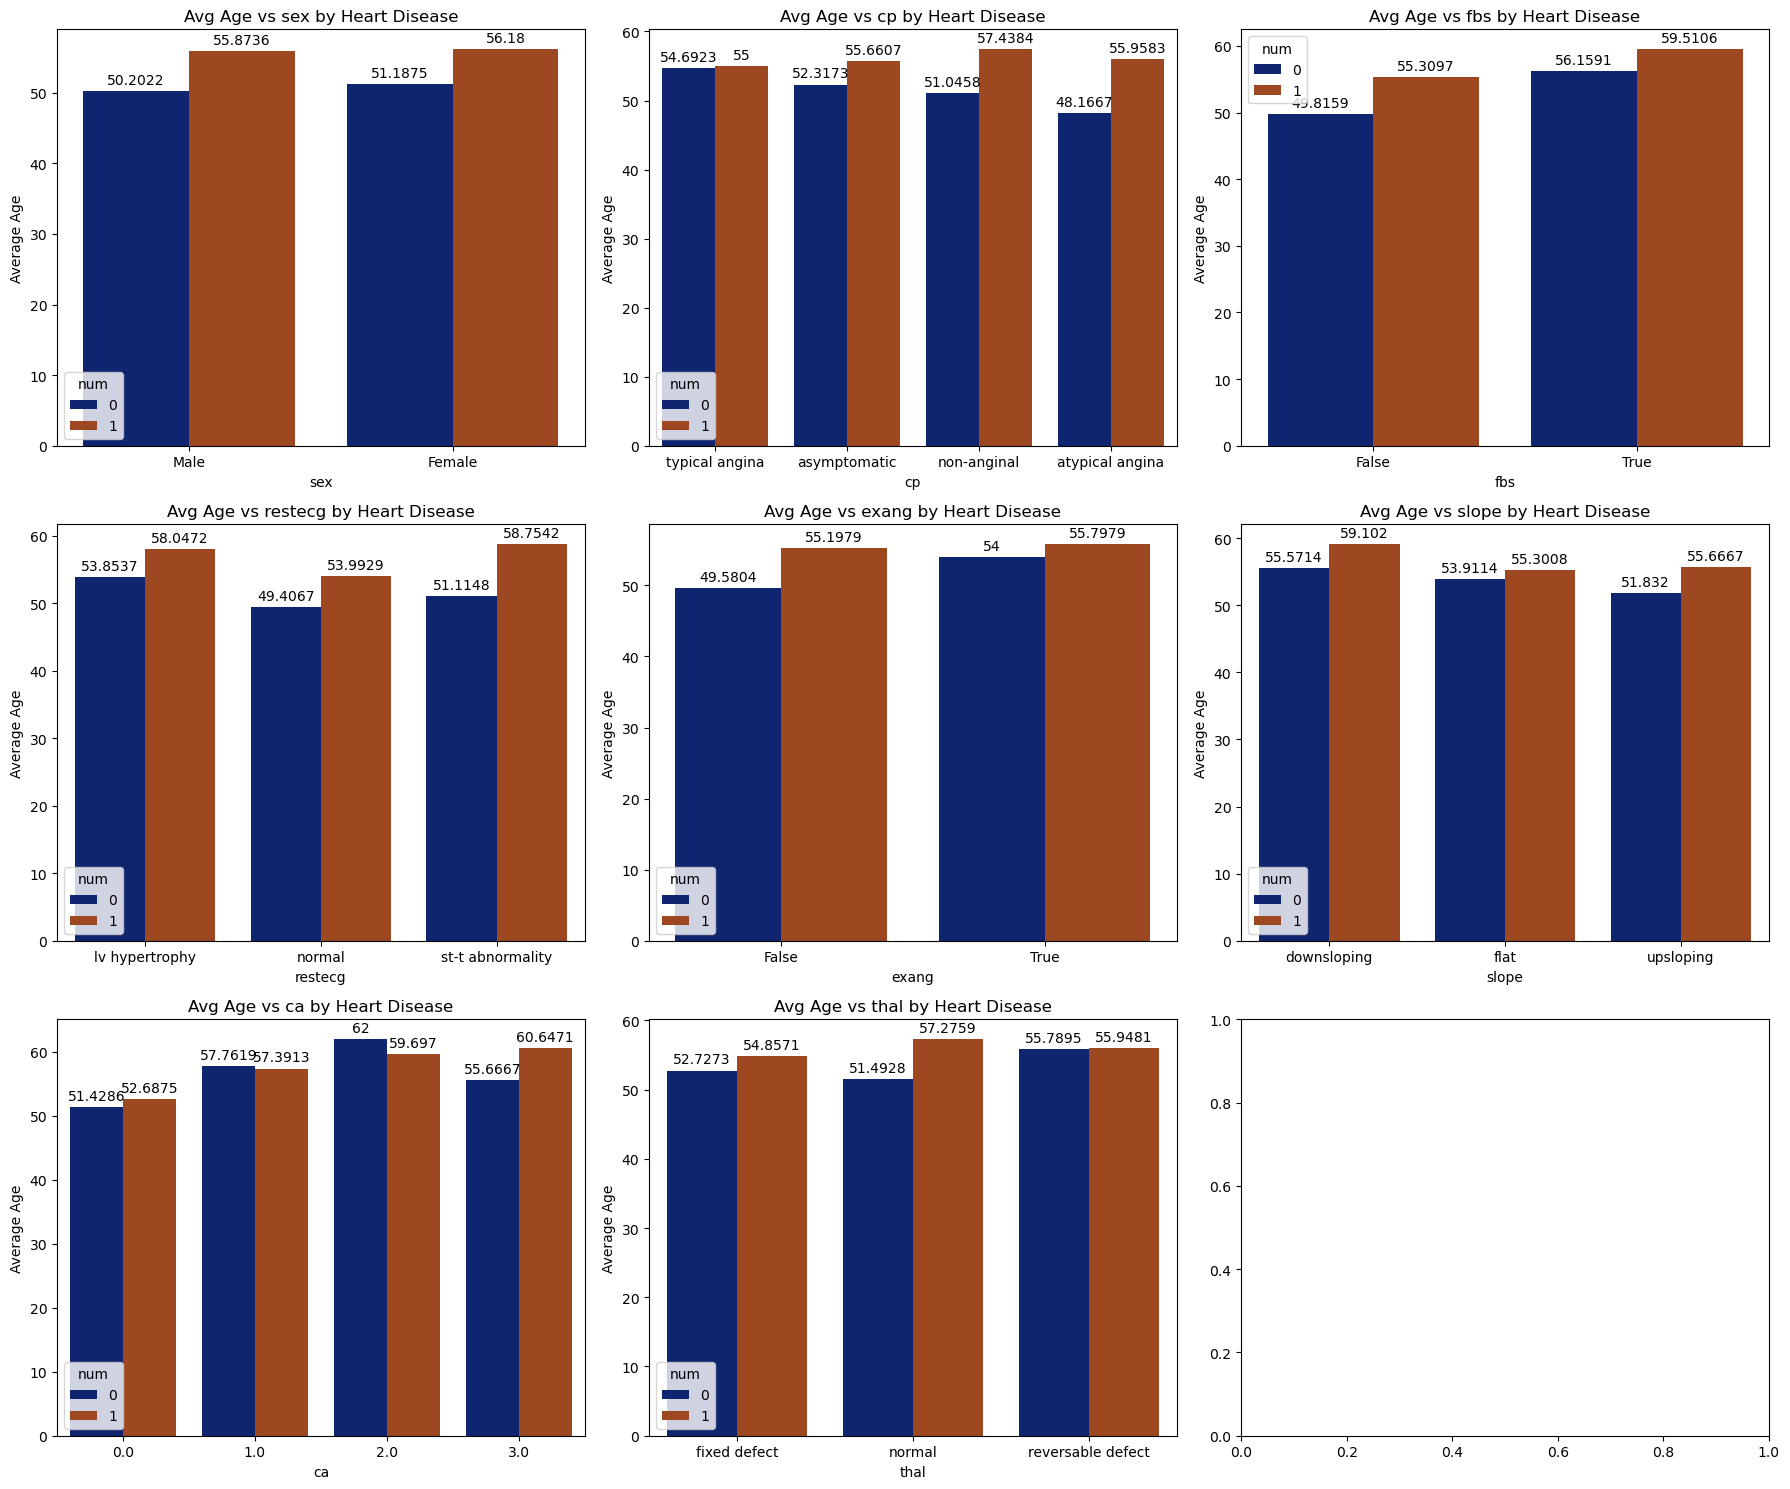

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

categorical_column = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

for i, col in enumerate(categorical_column):
    x = i // 3
    y = i % 3
    graph = sns.barplot(data=df, x=col, y="age", hue="num",
                        palette='dark', estimator=np.mean, errorbar=None, ax=ax[x, y])
    
    for container in graph.containers:
        graph.bar_label(container, label_type='edge', padding=3, fontsize=10)
    
    ax[x, y].set_title(f'Avg Age vs {col} by Heart Disease')
    ax[x, y].set_xlabel(col)
    ax[x, y].set_ylabel("Average Age")

plt.tight_layout()

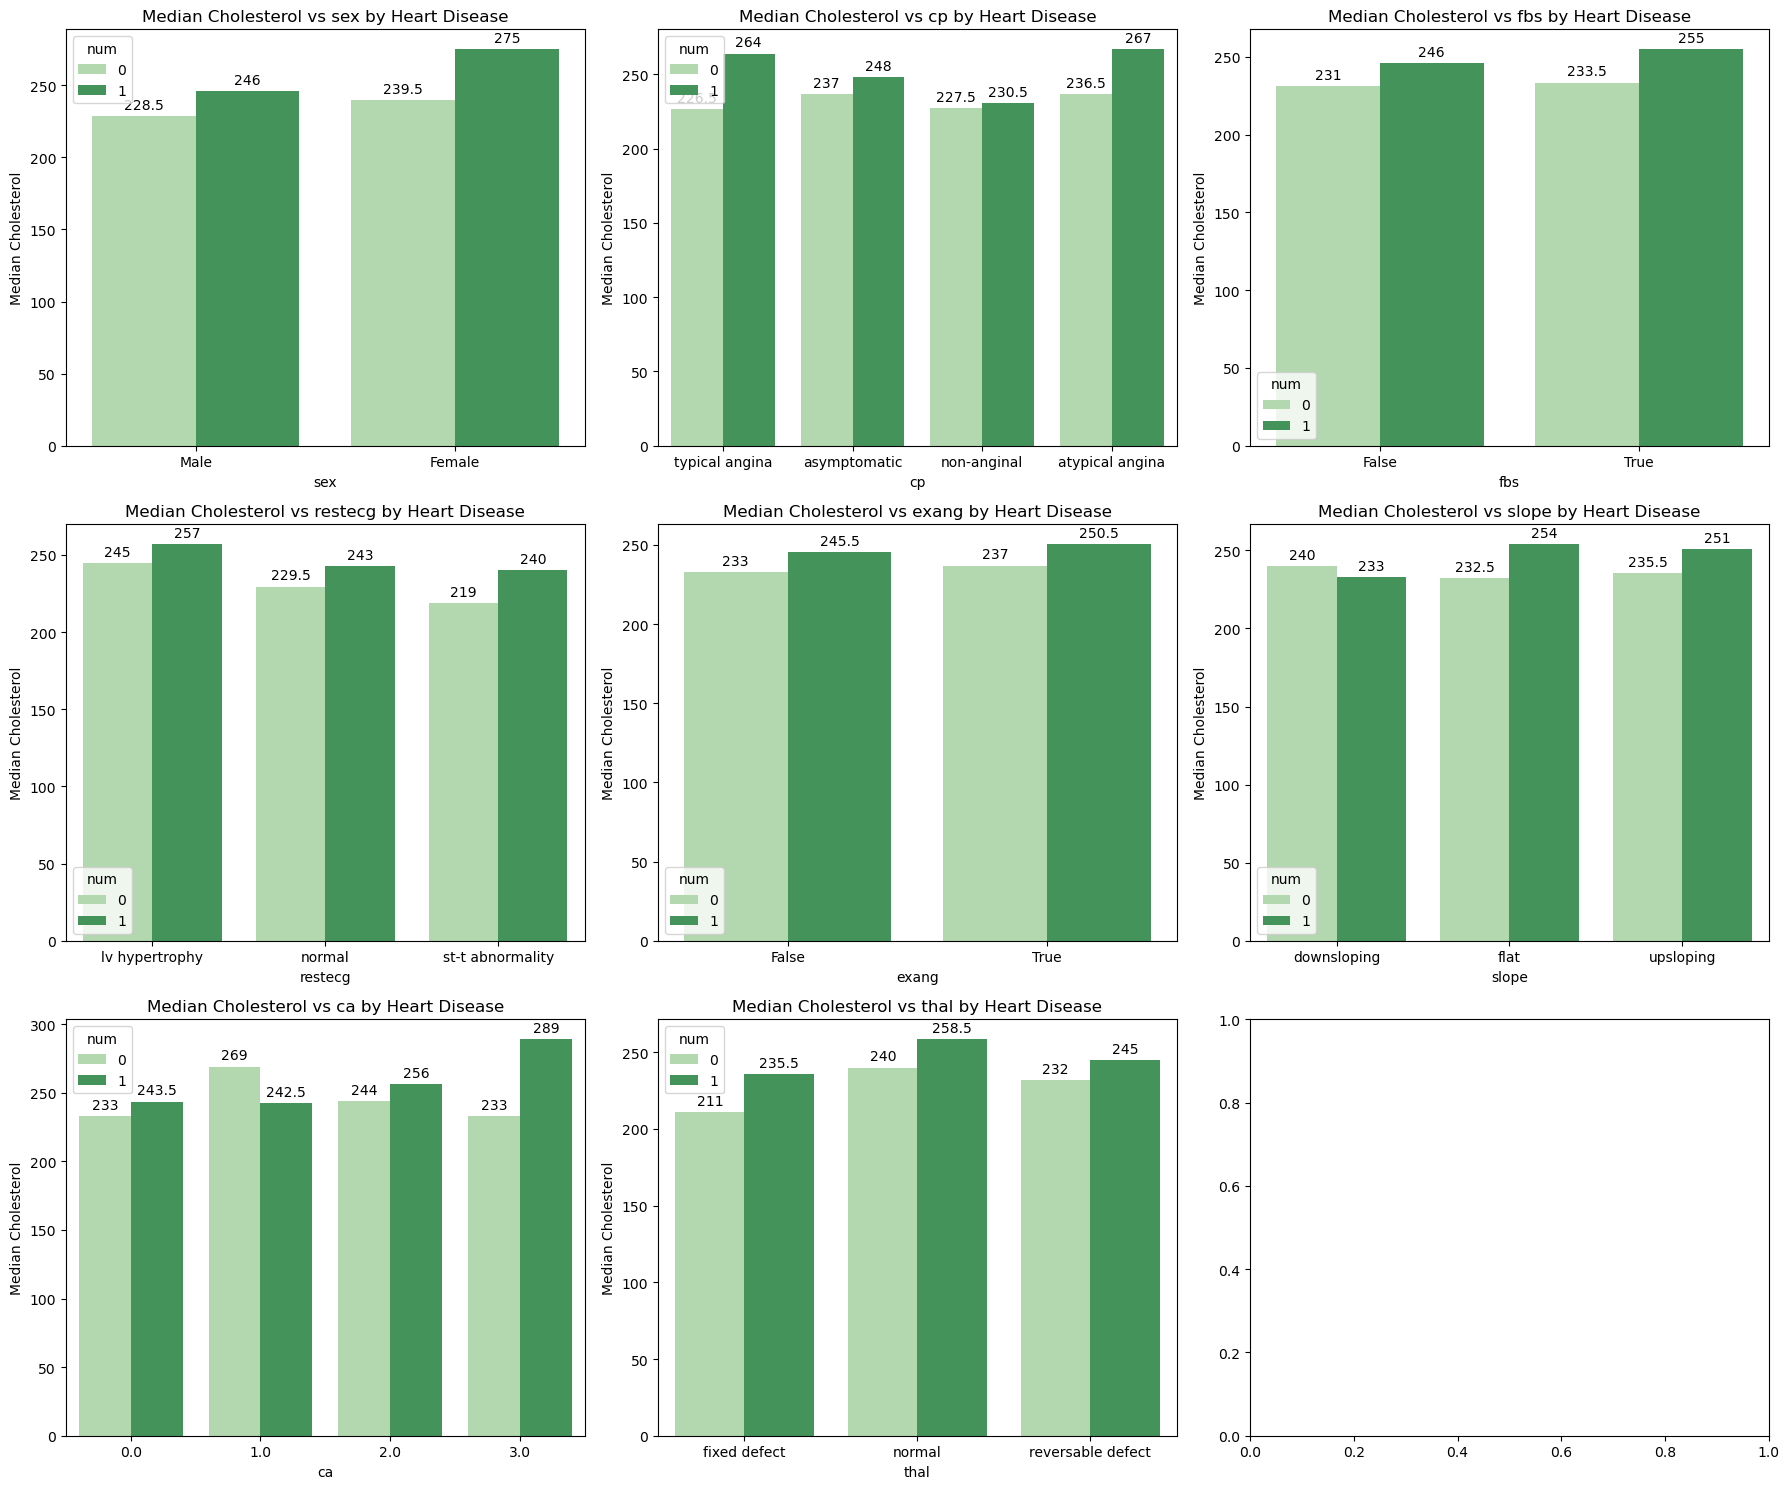

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

for i, col in enumerate(categorical_column):
    x = i // 3
    y = i % 3
    
    graph = sns.barplot(data=df, x=col, y="chol", hue="num",
                        palette='Greens', estimator=np.median, errorbar=None, ax=ax[x, y])
    
    for container in graph.containers:
        graph.bar_label(container, label_type='edge', padding=3, fontsize=10)

    ax[x, y].set_title(f'Median Cholesterol vs {col} by Heart Disease')
    ax[x, y].set_xlabel(col)
    ax[x, y].set_ylabel("Median Cholesterol")

plt.tight_layout()
plt.show()


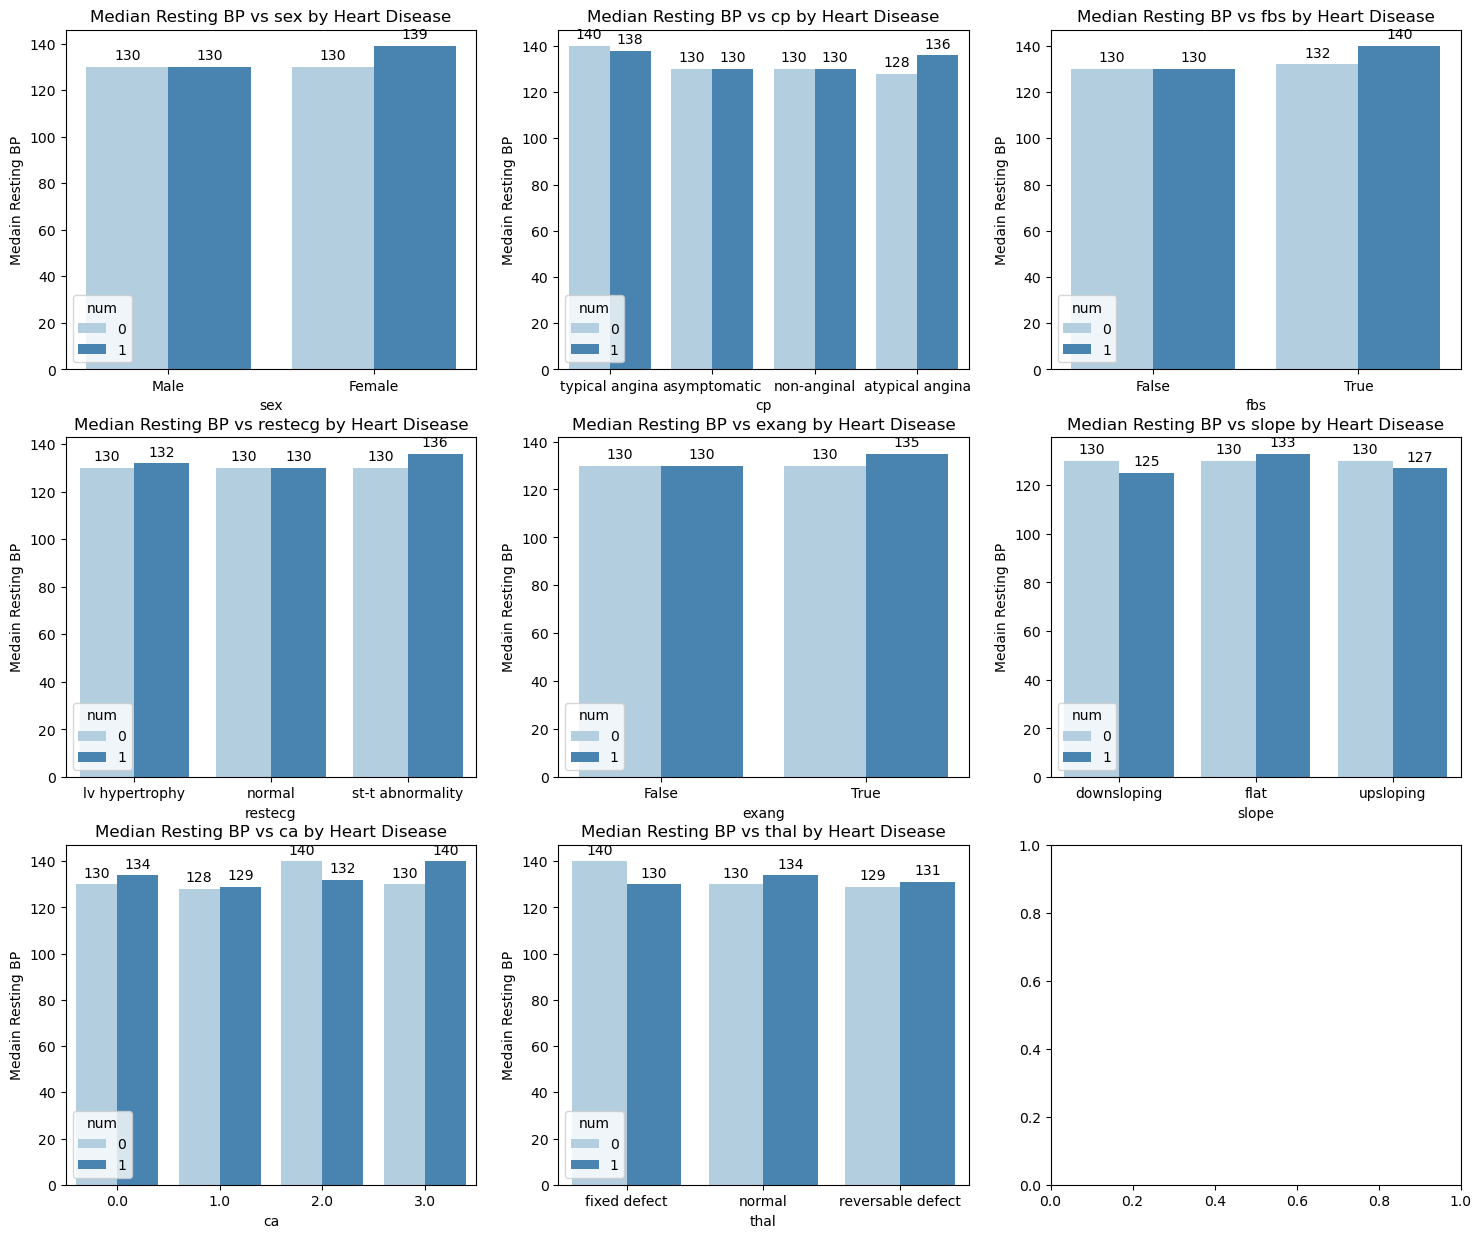

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

for i, col in enumerate(categorical_column):
    x = i // 3
    y = i % 3
    graph = sns.barplot(data=df, x=col, y="trestbps", hue="num",
                        palette='Blues', estimator=np.median, errorbar=None, ax=ax[x, y])
    
    for container in graph.containers:
        graph.bar_label(container, label_type='edge', padding=3, fontsize=10)
    
    ax[x, y].set_title(f'Median Resting BP vs {col} by Heart Disease')
    ax[x, y].set_xlabel(col)
    ax[x, y].set_ylabel("Medain Resting BP")

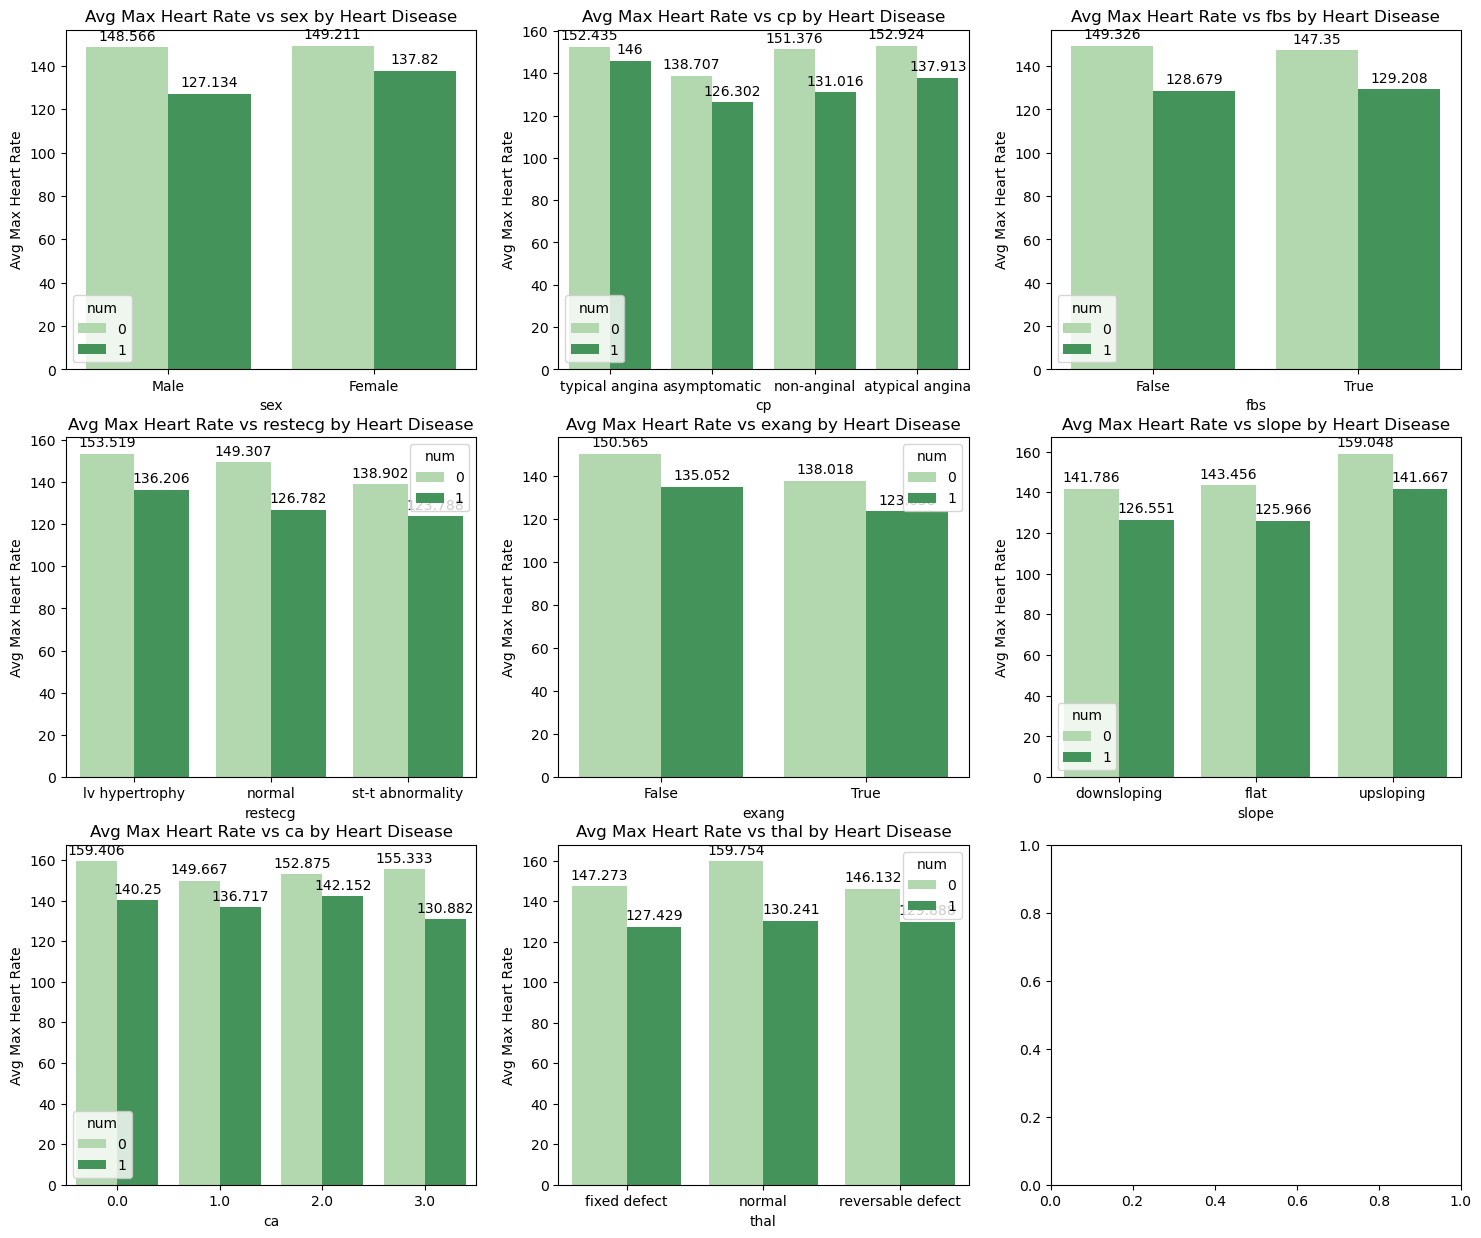

In [28]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

for i, col in enumerate(categorical_column):
    x = i // 3
    y = i % 3

    graph = sns.barplot(df, x=col, y="thalch", hue="num",
                        palette='Greens', estimator=np.mean, errorbar=None, ax=ax[x, y])
    
    for container in graph.containers:
        graph.bar_label(container, label_type='edge', padding=3, fontsize=10)

    ax[x, y].set_title(f'Avg Max Heart Rate vs {col} by Heart Disease')
    ax[x, y].set_xlabel(col)
    ax[x, y].set_ylabel("Avg Max Heart Rate")



62


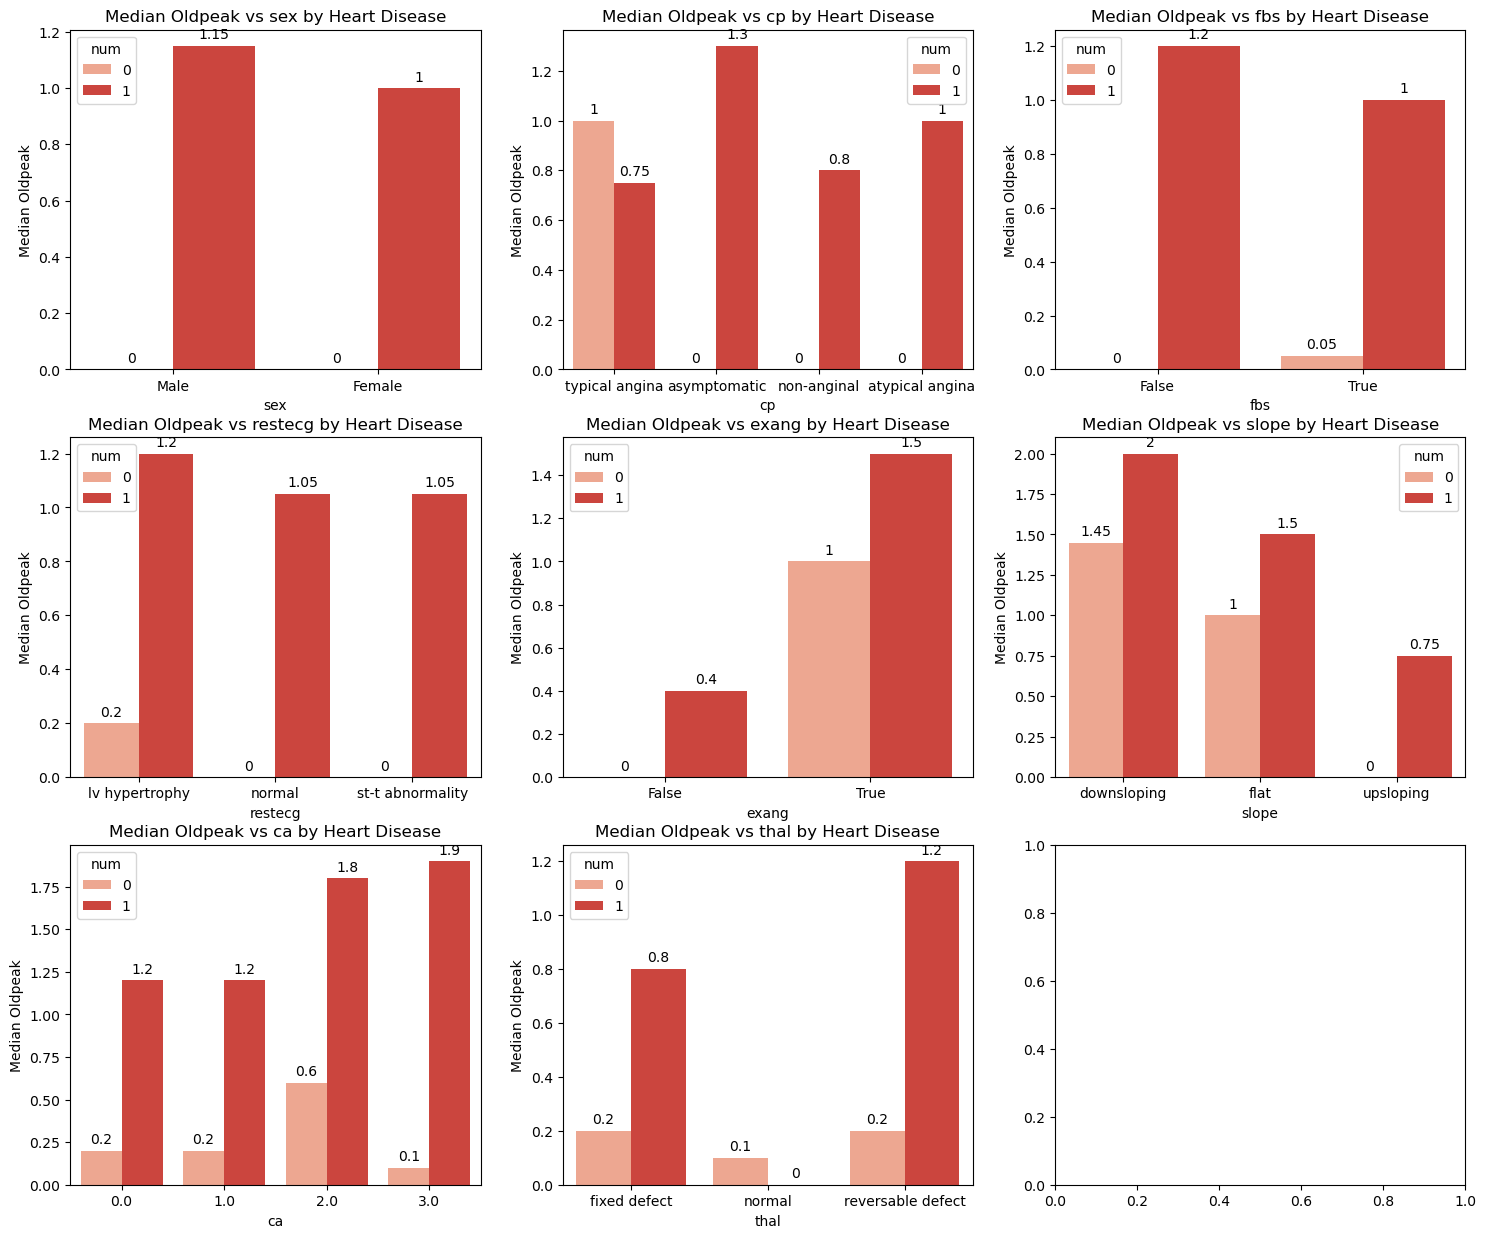

In [29]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
print(df['oldpeak'].isnull().sum())
for i, col in enumerate(categorical_column):
    x = i // 3
    y = i % 3

    graph = sns.barplot(data=df, x=col, y="oldpeak", hue="num",
                        palette='Reds', estimator=np.median, errorbar=None, ax=ax[x, y])
    
    for container in graph.containers:
        graph.bar_label(container, label_type='edge', padding=3, fontsize=10)

    ax[x, y].set_title(f'Median Oldpeak vs {col} by Heart Disease')
    ax[x, y].set_xlabel(col)
    ax[x, y].set_ylabel("Median Oldpeak")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  860 non-null    float64
 4   chol      718 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [31]:
df[df['num'] ==0].groupby('sex').count()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
sex,,,,,,,,,,,,,
Female,144,144,142,136,140,144,142,142,143,89,72,75,144
Male,267,267,249,236,257,267,249,249,247,129,93,112,267
